<a href="https://colab.research.google.com/github/Long-Live-Lord-Voldemort/Long-Live-Lord-Voldemort/blob/main/Algo_Trading_MovingAverageConvergenceDivergence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
pip install yfinance

In [50]:
import yfinance as yf
import matplotlib.pyplot as plt

In [51]:
df = yf.download('TSLA', start= '2021-04-01')

[*********************100%***********************]  1 of 1 completed


In [52]:
df.tail(11)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-04,1189.550049,1208.000000,1123.050049,1149.589966,1149.589966,33416100
2022-01-05,1146.650024,1170.339966,1081.010010,1088.119995,1088.119995,26706600
2022-01-06,1077.000000,1088.000000,1020.500000,1064.699951,1064.699951,30112200
2022-01-07,1080.369995,1080.930054,1010.000000,1026.959961,1026.959961,27919000
2022-01-10,1000.000000,1059.099976,980.000000,1058.119995,1058.119995,30605000
2022-01-11,1053.670044,1075.849976,1038.819946,1064.400024,1064.400024,22021100
2022-01-12,1078.849976,1114.839966,1072.589966,1106.219971,1106.219971,27913000
2022-01-13,1109.069946,1115.599976,1026.540039,1031.560059,1031.560059,32403300
2022-01-14,1019.880005,1052.000000,1013.380005,1049.609985,1049.609985,24246600


In [53]:
def MACD(df):
  df['EMA12'] = df.Close.ewm(span=12).mean()
  df['EMA26'] = df.Close.ewm(span=26).mean()
  df['MACD'] = df.EMA12 - df.EMA26
  df['signal'] = df.MACD.ewm(span=9).mean()
  print('Indicators added')

In [54]:
MACD(df)

Indicators added


In [55]:
df.tail(21)

,Open,High,Low,Close,Adj Close,Volume,EMA12,EMA26,MACD,signal
Date,,,,,,,,,,
2021-12-20,910.700012,921.690002,893.390015,899.940002,899.940002,18826700,980.414169,1013.166881,-32.752712,-12.778333
2021-12-21,916.869995,939.500000,886.119995,938.530029,938.530029,23839300,973.970455,1007.638221,-33.667766,-16.956219
2021-12-22,965.659973,1015.659973,957.049988,1008.869995,1008.869995,31211400,979.339615,1007.729464,-28.389849,-19.242945
2021-12-23,1006.799988,1072.979980,997.559998,1067.000000,1067.000000,30904400,992.825828,1012.119877,-19.294048,-19.253166
2021-12-27,1073.670044,1117.000000,1070.719971,1093.939941,1093.939941,23715300,1008.381846,1018.180626,-9.798780,-17.362289
2021-12-28,1109.489990,1119.000000,1078.420044,1088.469971,1088.469971,20108000,1020.703096,1023.387246,-2.684151,-14.426661
2021-12-29,1098.640015,1104.000000,1064.140015,1086.189941,1086.189941,18718000,1030.777995,1028.039300,2.738695,-10.993590
2021-12-30,1061.329956,1095.550049,1053.150024,1070.339966,1070.339966,15680300,1036.864452,1031.172684,5.691768,-7.656518
2021-12-31,1073.439941,1082.000000,1054.589966,1056.780029,1056.780029,13577900,1039.928387,1033.069525,6.858862,-4.753442


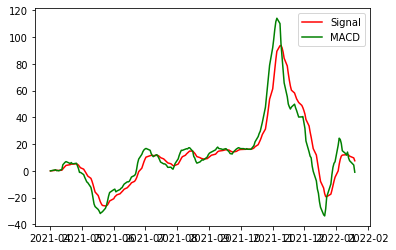

In [56]:
plt.plot(df.signal, label='Signal', color='red')
plt.plot(df.MACD, label='MACD', color='green')
plt.legend()
plt.show()

In [57]:
Buy, Sell = [], []

for i in range(2, len(df)):
  if df.MACD.iloc[1] > df.signal.iloc[i] and df.MACD.iloc[i-1] < df.signal.iloc[i-1]:
    Buy.append(i)
  elif df.MACD.iloc[i] < df.signal.iloc[i] and df.MACD.iloc[i-1] > df.signal.iloc[i-1]:
    Sell.append(i)

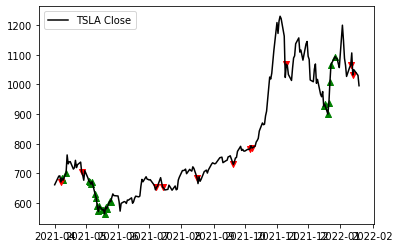

In [58]:
plt.scatter(df.iloc[Buy].index, df.iloc[Buy].Close, marker="^", color='green')
plt.scatter(df.iloc[Sell].index, df.iloc[Sell].Close, marker="v", color='red')
plt.plot(df.Close, label='TSLA Close', color='k')
plt.legend()
plt.show()

In [59]:
Realbuys = [i+1 for i in Buy]
Realsells = [i+1 for i in Sell]


In [60]:
Buyprices = df.Open.iloc[Realbuys]
Sellprices = df.Open.iloc[Realsells]

In [61]:
Buyprices

Date
2021-04-09     677.770020
2021-04-12     685.700012
2021-04-13     712.700012
2021-05-05     681.059998
2021-05-06     680.760010
2021-05-07     665.799988
2021-05-10     664.900024
2021-05-11     599.239990
2021-05-12     602.489990
2021-05-13     601.539978
2021-05-14     583.409973
2021-05-17     575.549988
2021-05-18     568.000000
2021-05-19     552.549988
2021-05-20     575.000000
2021-05-21     596.109985
2021-05-24     581.599976
2021-05-25     607.309998
2021-05-26     607.559998
2021-12-17     914.770020
2021-12-20     910.700012
2021-12-21     916.869995
2021-12-22     965.659973
2021-12-23    1006.799988
2021-12-27    1073.670044
2021-12-28    1109.489990
Name: Open, dtype: float64

In [62]:
Sellprices

Date
2021-04-08     677.380005
2021-04-28     696.409973
2021-07-09     653.179993
2021-07-15     658.390015
2021-08-17     672.659973
2021-09-21     734.789978
2021-10-07     785.460022
2021-10-11     787.650024
2021-11-11    1102.770020
2022-01-12    1078.849976
2022-01-14    1019.880005
Name: Open, dtype: float64

In [64]:
if Sellprices.index [0] < Buyprices.index[0]:
  Sellprices = Sellprices.drop(Sellprices.index[0])
elif Buyprices.index[-1] > Sellprices.index[-1]:
  Buyprices = Buyprices.drop(Buyprices.index[-1])

In [65]:
profitsrel = []

for i in range(len(Sellprices)):
  profitsrel.append((Sellprices[i] - Buyprices[i])/Buyprices[i])

In [66]:
profitsrel

[0.027501885707740155,
 -0.047426015680792105,
 -0.07620316630893688,
 -0.012333750982548082,
 0.07936713009966673,
 0.17972369536434404,
 0.1846142209246757,
 0.8402810852125108,
 0.7906521155085969,
 0.6954484192843665]

In [67]:
sum(profitsrel)

2.661625619129624

In [69]:
sum(profitsrel)/len(profitsrel)

0.2661625619129624